Calcium imaging
===============
Single stimulation/application

In [1]:
import numpy as np
from numpy import ma
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as anm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap

import plotly.express as px

from skimage.util import montage
from skimage.filters import rank
from skimage import morphology
from skimage import exposure
from skimage import measure
from skimage import filters
from skimage import io

from scipy import ndimage
from scipy import signal
from scipy import stats


from domb.reg_type import wf_x2_m2 as wf
from domb.fret.e_fret.e_app import Eapp
from domb.red_green import wt_vs_mut_multistim
from domb.utils import plot
from domb.utils.plot import CMaps
from domb.utils import masking

23_06_06_04 - bad FRET (>30%)

23_06_28_05 - bad soma

23_06_28_04 - bad WT

23_06_28_02 - good?

23_06_23_11 - good?

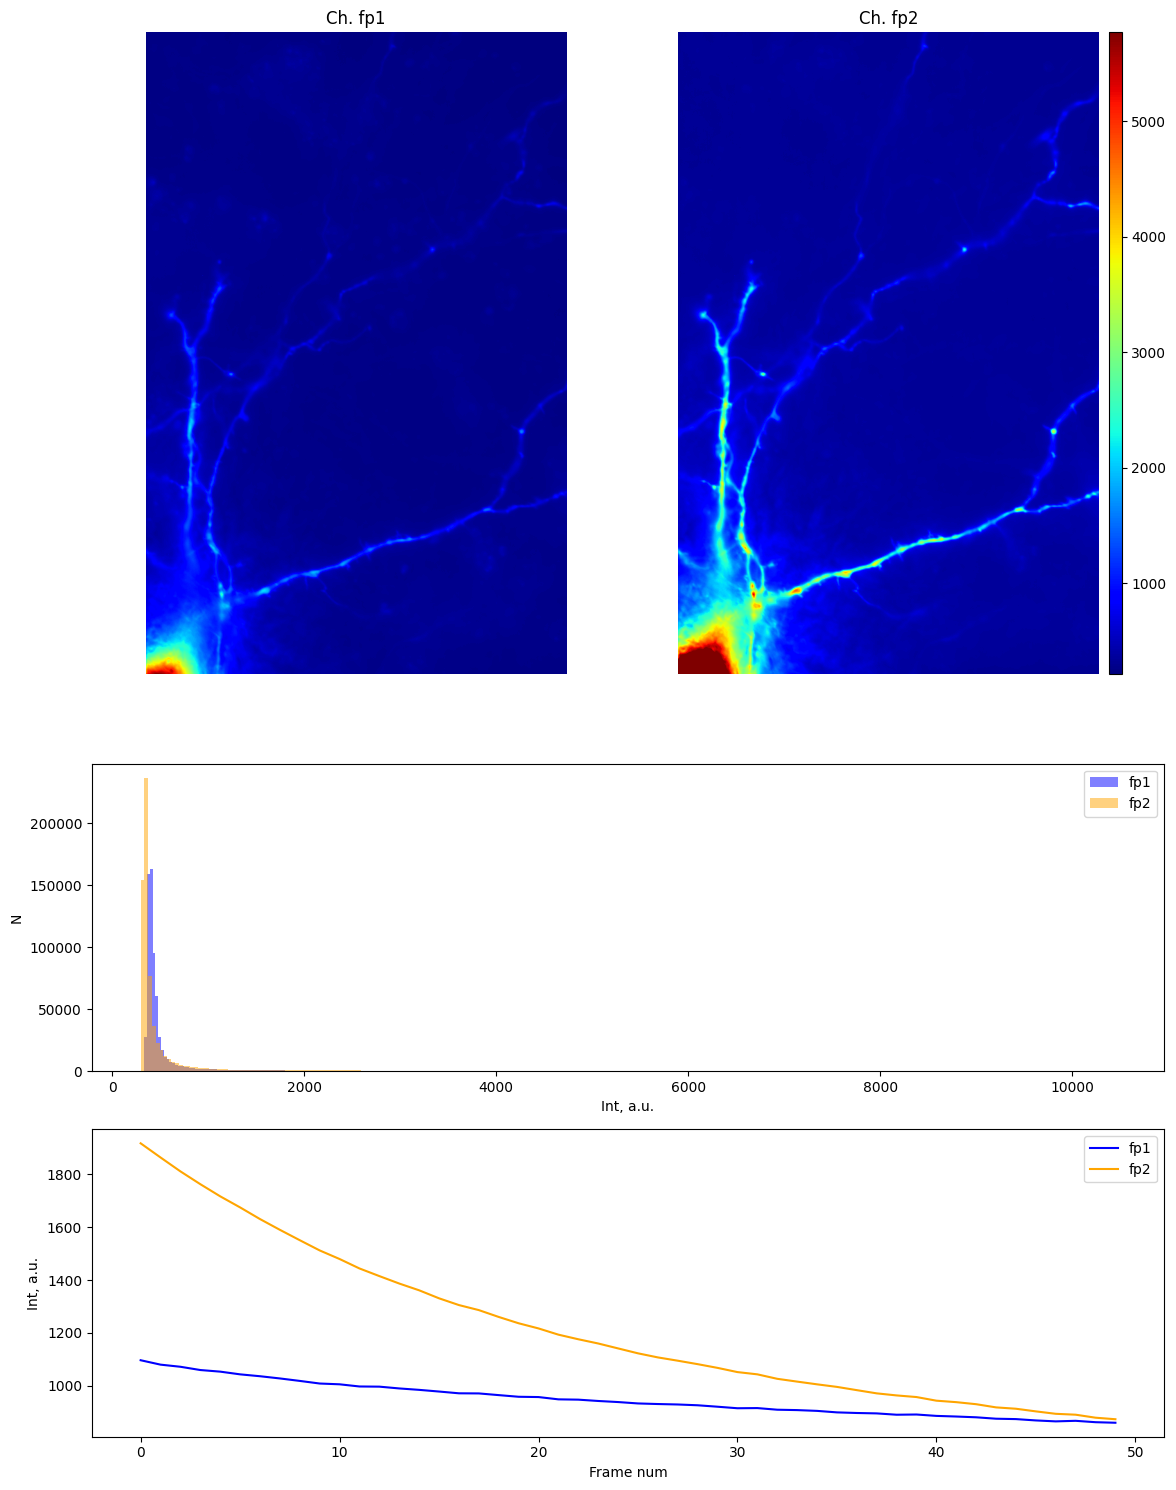

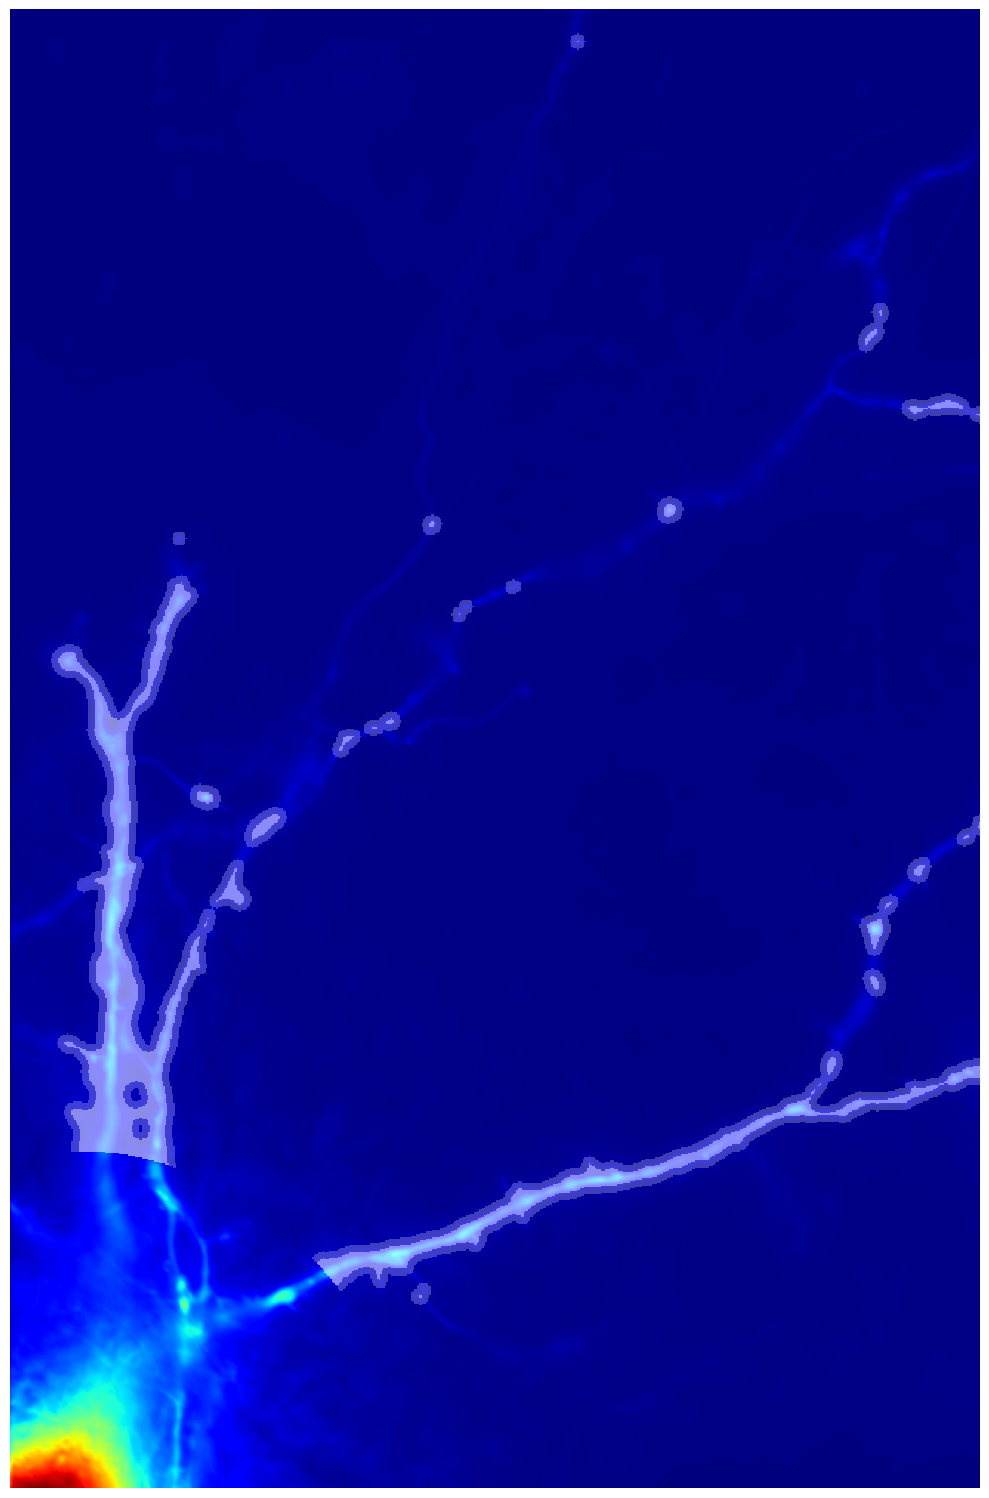

In [2]:
reg_path = 'data/wt_vs_mut/23_06_23_11.tif'
reg_name = reg_path.split('/')[-1]
reg_name = reg_name.split('.')[0]


# fp1-CFP, fp2-YFP or fp1-RFP, fp2-YFP
reg = WF(img_path=reg_path, img_name=reg_name, ch_order={'fp1':1,'fp2':3}, wf_sigma=.75, border_crop=20,
         soma_mask=True, soma_th=.7, soma_ext=200, proc_sigma=1)  # processes masking parameters

reg.ch_pic()
reg.processes_mask_pic()

## RG

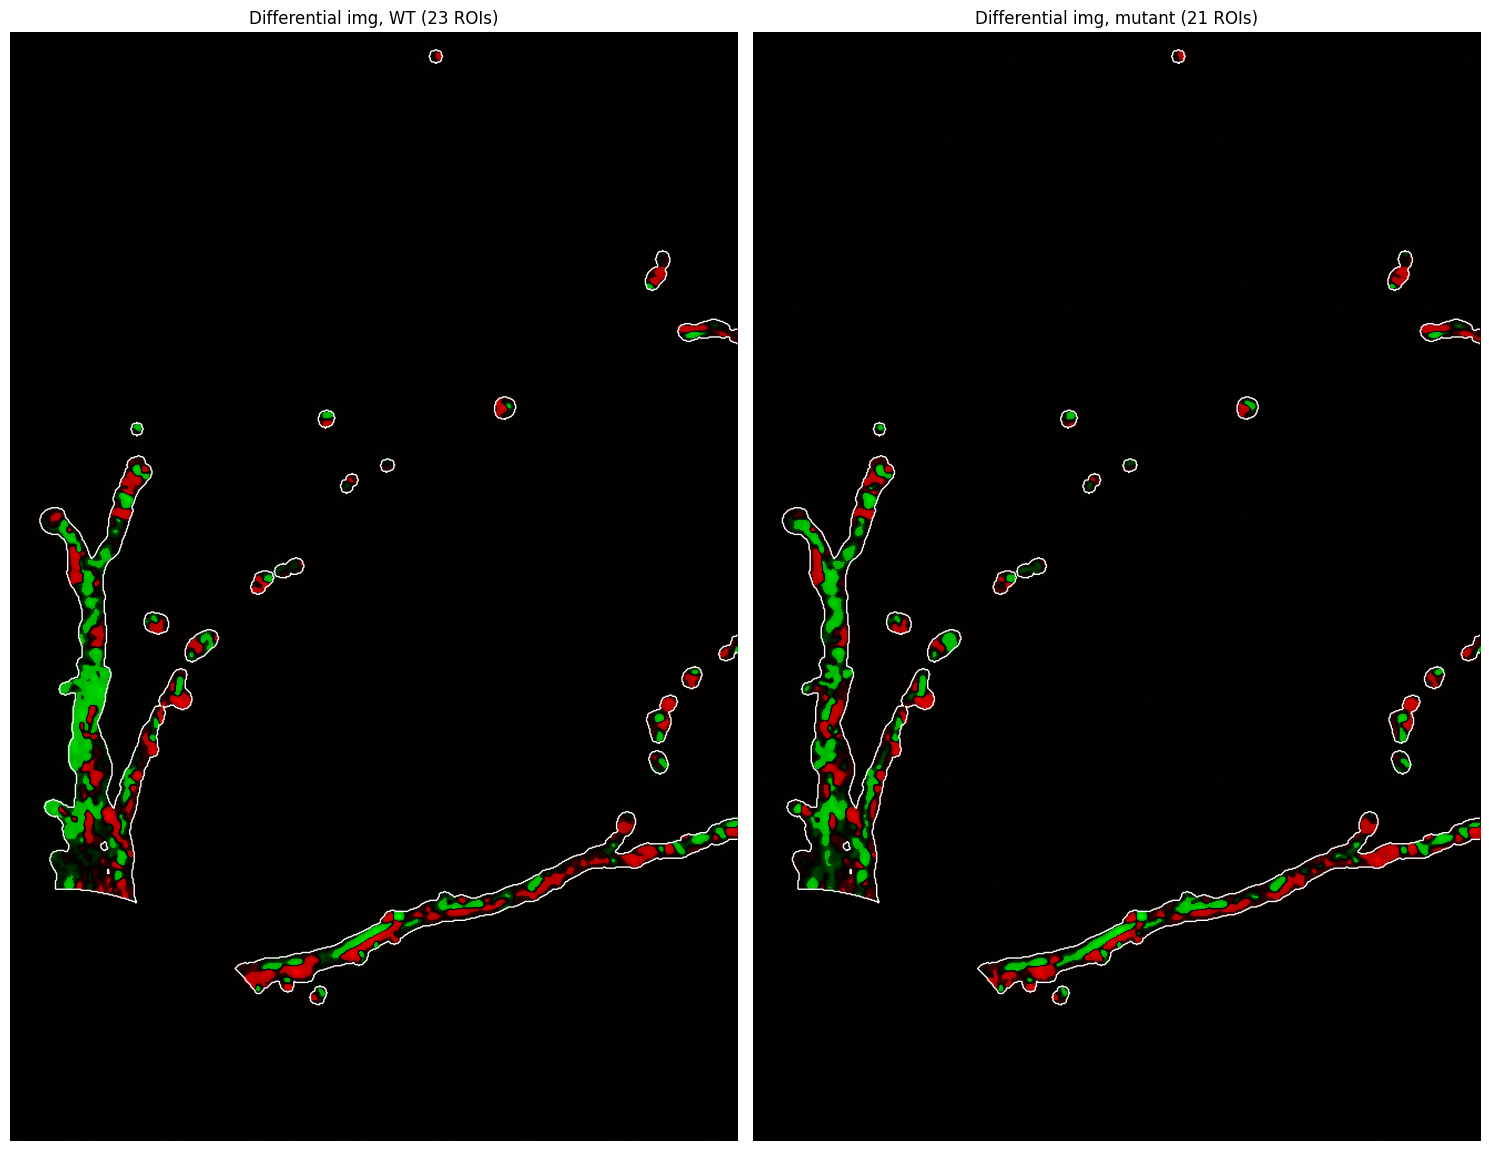

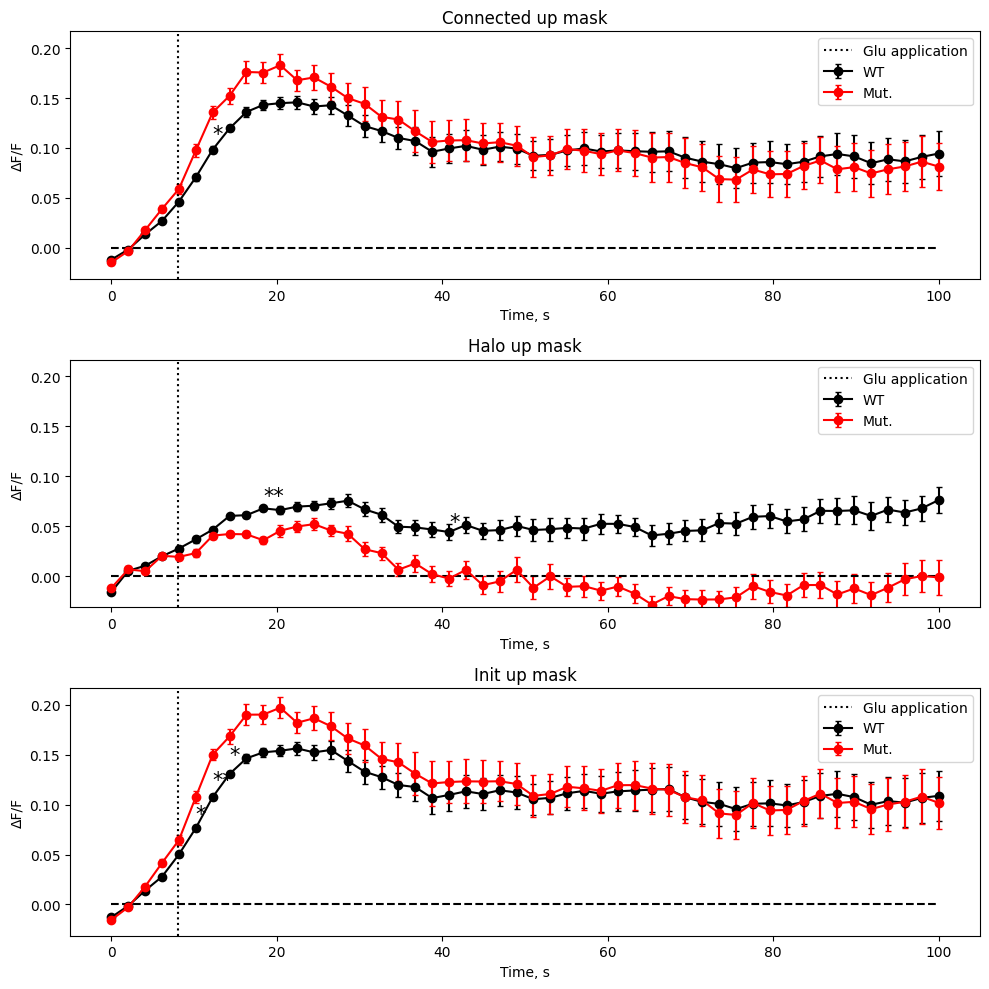

In [4]:
reg_RG = WvM(wt_img=reg.corr_fp1_img,
             mut_img=reg.corr_fp2_img,
             narrow_proc_mask=reg.narrow_proc_mask,
             proc_mask=reg.proc_mask,
             sd_tolerance=1.5, base_frames=5, stim_start=5, stim_win=5)  # up mask calc parameters

reg_RG.diff_img_pic()
reg_RG.df_mean_prof_pic()